# PHYS 434 HW 2

### Joseph Bu

### 1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

It is more probable to roll sevens where the dice sum to seven. The ratio of the probabilities is 36:216 or 6:36

In [127]:
P_snake_eyes = 1/36
P_seven = 6/36

P_snake_eyes / P_seven

0.16666666666666666

## 2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

To determine the probability of the sum of 2 six sided dice, you would take the frequency of the event divided by the size of the possible combinations.
So the 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

In [26]:
dice_1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
con_1 = np.convolve(dice_1, dice_2)
con_1

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

Text(0, 0.5, 'Probabilities')

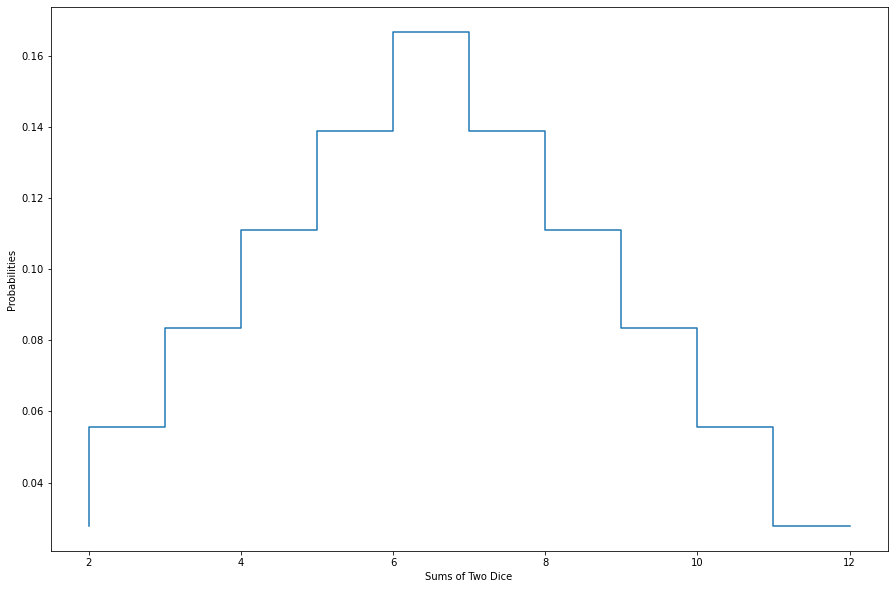

In [60]:
dice_sums = [2, 3, 4, 5, 6, 7, 8 ,9, 10, 11, 12]
plt.step(dice_sums, con_1)
plt.xlabel('Sums of Two Dice')
plt.ylabel('Probabilities')

## 3) Calculate the mean and the variance of the distribution in problem 2. 

In [70]:
mean = np.sum(dice_sums@con_1)
mean

7.0

In [82]:
variance = np.sum(con_1@((mean-dice_sums)**2))
variance

5.833333333333333

## 4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

In [85]:
dice_3 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_4 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_5 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_6 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_7 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_8 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_9 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_10 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

con_2 = np.convolve(con_1, dice_3)
con_3 = np.convolve(con_2, dice_4)
con_4 = np.convolve(con_3, dice_5)
con_5 = np.convolve(con_4, dice_6)
con_6 = np.convolve(con_5, dice_7)
con_7 = np.convolve(con_6, dice_8)
con_8 = np.convolve(con_7, dice_9)
con_9 = np.convolve(con_8, dice_10)
con_9

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

<function matplotlib.pyplot.show(close=None, block=None)>

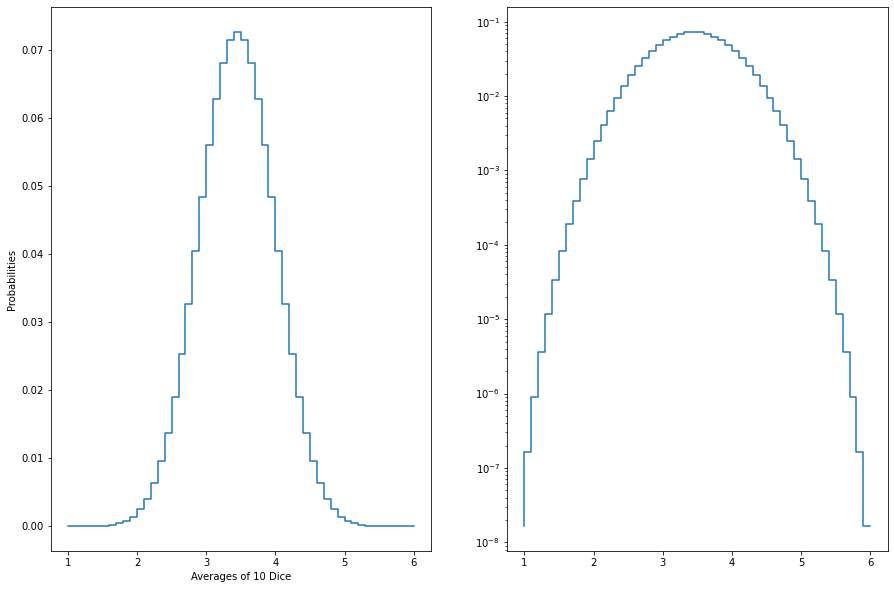

In [126]:
sums_10 = np.arange(10, 61, 1)
avg_10 = sums_10/10

fig, ax = plt.subplots(1, 2)

ax[0].step(avg_10, con_9)
ax[0].set_xlabel('Averages of 10 Dice')
ax[0].set_ylabel('Probabilities')

ax[1].step(avg_10, con_9)
ax[1].set_yscale('log')
plt.show

So when we convolve our 10 dice, we can see the averages as shown by our distribution. When we plot the log of that distribution as well it shows that it must be a Gaussian.

## 5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

<function matplotlib.pyplot.show(close=None, block=None)>

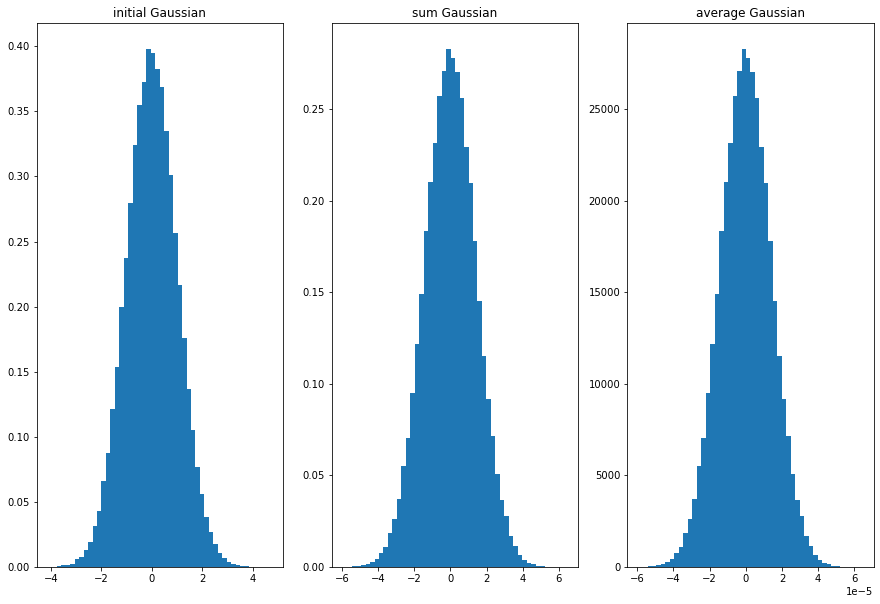

In [118]:
d_norm_1 = stats.norm.rvs(loc = 0, scale = 1, size = 100000)
d_norm_2 = stats.norm.rvs(loc = 0, scale = 1, size = 100000)

fig, ax = plt.subplots(1, 3)
ax[0].hist(d_norm_1, 50, density=True)
ax[0].set_title('initial Gaussian')

d_sum = d_norm_1 + d_norm_2

ax[1].hist(d_sum, 50, density=True)
ax[1].set_title('sum Gaussian')

d_avg = d_sum / len(d_norm_1)

ax[2].hist(d_avg, 50, density=True)
ax[2].set_title('average Gaussian')

plt.show


In [121]:
std_init = np.std(d_norm_1)
std_init

1.0025805281882447

In [122]:
std_sum = np.std(d_sum)
std_sum

1.4127428399883586

In [123]:
avg_std = np.std(d_avg)
avg_std

1.4127428399883585e-05

So as we can see the standard deviation of the resulting average Gaussian decreases. So what this means in terms of integrating a signal over time is that
when we average we decrease the standard deviation thereby decreasing our uncertainty.